In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
plt.style.use('seaborn')
import cufflinks as cf
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
cf.set_config_file(offline=True)

In [12]:
# Get dhte S&P long term data
tickers = ['^GSPC']

# Download closing prices
sp = pdr.get_data_yahoo(tickers, start="1927-12-01", end=dt.date.today())['Adj Close']
 
#From the closing prices, calculate periodic returns
sp['returns'] = sp.pct_change()

In [22]:
sp.head()

Symbols,^GSPC,returns,max,drawdown
Date,,,,
1927-12-30,17.660000,NaN,NaN,NaN
1928-01-03,17.760000,0.005663,1.005679,0.000000
1928-01-04,17.719999,-0.002252,1.005679,0.002263
1928-01-05,17.549999,-0.009594,1.005679,0.011843
1928-01-06,17.660000,0.006268,1.005679,0.005594


In [35]:
sp.tail()

Symbols,^GSPC,returns,max,drawdown
Date,,,,
2020-03-13,2711.020020,0.092871,974.166518,178.842493
2020-03-16,2386.129883,-0.119841,974.166518,268.664905
2020-03-17,2529.189941,0.059955,974.166518,225.072944
2020-03-18,2398.100098,-0.051831,974.166518,262.910003
2020-03-19,2401.659912,0.001484,974.166518,261.853408


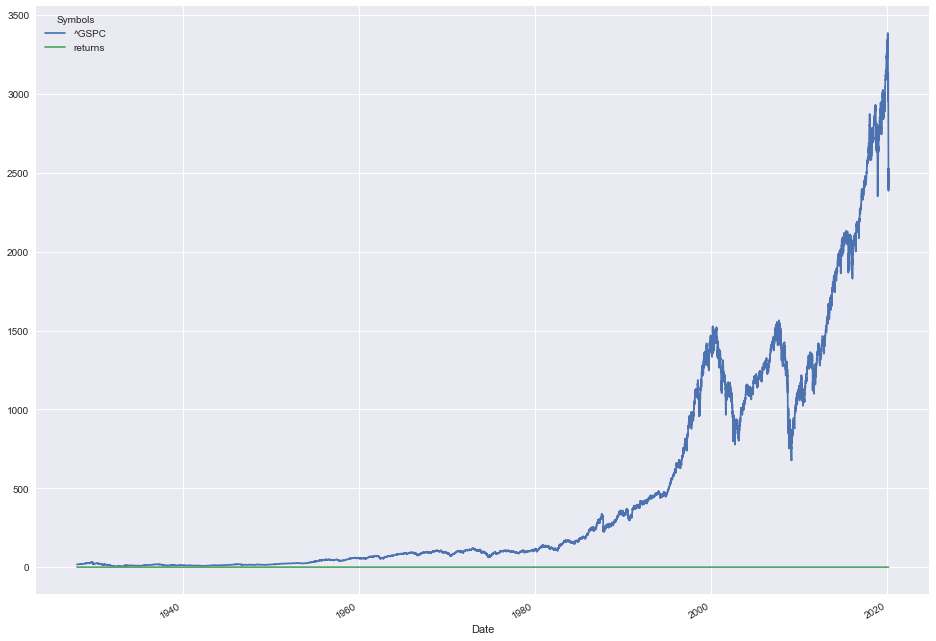

In [13]:
sp.plot(figsize=(16,12))

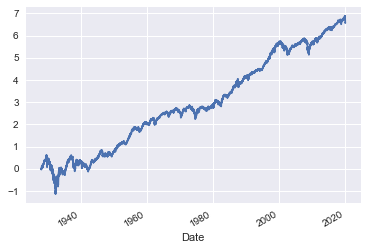

In [23]:
sp['cum returns'] = sp['returns'].cumsum().plot()

In [36]:
sp['max'] = sp['returns'].cumsum().apply(np.exp).cummax()

In [38]:
spr['drawdown'] = sp['max'] - sp['returns'].cumsum().apply(np.exp)
sp.dropna(inplace=True)

In [39]:
max(sp['drawdown'])

268.66490476639456

In [41]:
t = sp['drawdown'].idxmax()
t

Timestamp('2020-03-16 00:00:00')

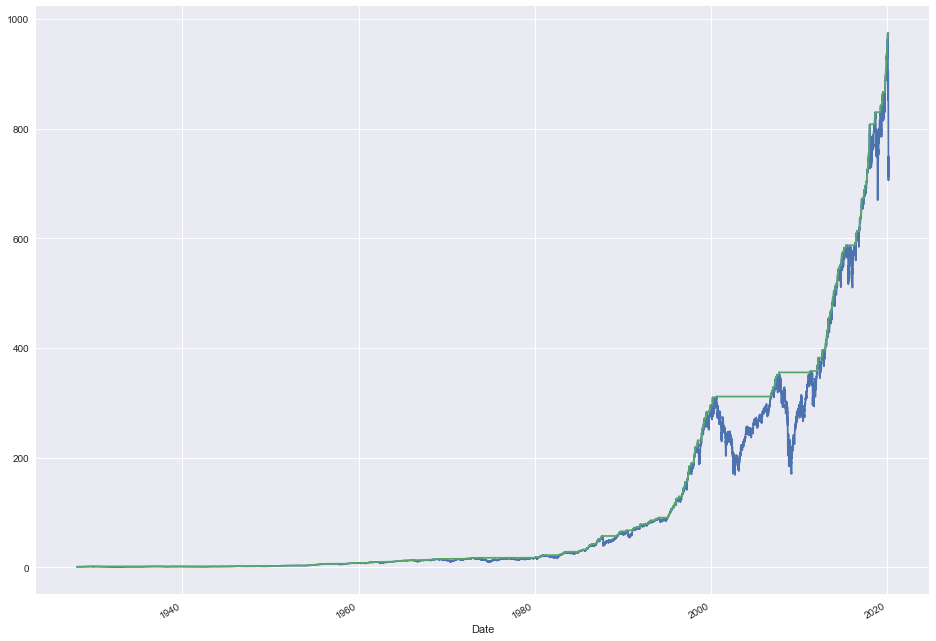

In [45]:
ax = sp['returns'].cumsum().apply(np.exp).plot(figsize=(16, 12))
sp['max'].plot(ax=ax)
#plt.axvline(t, c='r');